<a href="https://colab.research.google.com/github/vaaibhavkumar/BusinessDataAnalysis/blob/master/MSIS522_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree & Ensemble Learning

Classification And Regression Trees (CART for short) is a term introduced by [Leo Breiman](https://en.wikipedia.org/wiki/Leo_Breiman) to refer to Decision Tree algorithms that can be used for classification or regression predictive modeling problems.

In this lab assignment, you will implement various ways to calculate impurity which is used to split data in constructing the decision trees and apply the Decision Tree and ensemble learning algorithms to solve two real-world problems: a classification one and a regression one. 

In [0]:
# import packages
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.legend_handler import HandlerLine2D
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

# make this notebook's output stable across runs
np.random.seed(0) 

## Gini impurity and Entropy


#### Gini impurity

The CART algorithm recursively splits the training set into two subsets using a single feature k and a threshold $t_k$. The best feature and threshold are chosen to produce the purest subsets weighted by their size. **Gini impurity** measures the impurity of the data points in a set and is used to evaluate how good a split is when the CART algorithm searches for the best pair of feature and the threshold.

To compute Gini impurity for a set of items with J classes, suppose $i \in \{1, 2, \dots, J\}$ and let $p_i$ be the fraction of items labeled with class i in the set.
\begin{align}
I(p) = 1 - \sum_{i=1}^J p_i^2
\end{align}

The following function calculates the gini impurity for a given set of data points.

In [0]:
def gini_impurity(x):
    """
    This function calculate the Gini impurity for a given set of data points.

    Args:
    x: a numpy ndarray
    """
    unique, counts = np.unique(x, return_counts=True)
    probabilities = counts / sum(counts)
    gini = 1 - sum([p*p for p in probabilities])

    return gini

In [0]:
np.testing.assert_equal(0, gini_impurity(np.array([1, 1, 1])))
#np.testing.assert_equal(0.5, gini_impurity(np.array([1, 0, 1, 0])))
#np.testing.assert_equal(3/4, gini_impurity(np.array(['a', 'b', 'c', 'd'])))
#np.testing.assert_almost_equal(2.0/3, gini_impurity(np.array([1, 2, 3, 1, 2, 3])))

#### 1. Entropy

Another popular measure of impurity is called **entropy**, which measures the average information content of a message. Entropy is zero when all messages are identical. When it applied to CART, a set's entropy is zero when it contains instances of only one class. Entropy is calculated as follows:
\begin{align}
I(p) = - \sum_{i=1}^J p_i log_2{p_i}
\end{align}

<span style="color:orange">**Question 1: In this exercise, you will implement the entropy function.**

In [0]:
def test_entropy(x):
    import numpy as np
    import math                                       # to implement log, imported it
    unique, counts = np.unique(x,return_counts=True)
    probabilities = counts/sum(counts)
    
    entropy_elements=[]  # initialized an empty list which will store the x*logx values
    for item in probabilities:
        log_probability_item = math.log2(item)
        entropy_elements.append(item*log_probability_item*-1)
        #print(log_probability),    print(entropy_elements),  print("Entropy of given data sets = "+str(sum(entropy_elements) ))
    e = sum(entropy_elements)
    return e

print(test_entropy(['a',2,3,4,5,5])) #2.251629167387823)
print(test_entropy(['a','a']))      

2.251629167387823
0.0


In [0]:
def test_entropy2(x):
    import numpy as np
    import math                                       # to implement log, imported it
    unique, counts = np.unique(x,return_counts=True)
    probabilities = counts/sum(counts)
    e = (sum(p*abs((math.log2(p))))for p in probabilities) ## This is the same approach as shared in the example above 
    return e

print(test_entropy2(['a',2,3,4,5,5])) #2.251629167387823              # Not sure why result is not getting populated
print(test_entropy2(['a','a']) )                                      # Not sure why result is not getting populated 

<generator object test_entropy2.<locals>.<genexpr> at 0x7f739acbcca8>
<generator object test_entropy2.<locals>.<genexpr> at 0x7f739acbcca8>


In [0]:
print(test_entropy(['a',2,3,4,5,5]))    #2.251629167387823
print(test_entropy2(['a',2,3,4,5,5]))   #2.251629167387823

2.251629167387823
<generator object test_entropy2.<locals>.<genexpr> at 0x7f73c0957830>


In [0]:
def entropy(x):
    """
    TODO: This function calculate the entropy of an array.
    Args:
    x: a numpy ndarray
    """
    e = 0 # TODO
    import numpy as np
    import math                                       # to implement log, imported it
    unique, counts = np.unique(x,return_counts=True)
    probabilities = counts/sum(counts)

    entropy_elements=[]  # initialized an empty list which will store the x*logx values
    for item in probabilities:
        probability = math.log2(item)
        entropy_elements.append(item*probability*-1)
        e = sum(entropy_elements)
    return e

In [0]:
np.testing.assert_equal(0, entropy(np.array([1, 1, 1])))
np.testing.assert_equal(1.0, entropy(np.array([1, 0, 1, 0])))
np.testing.assert_equal(2.0, entropy(np.array(['a', 'b', 'c', 'd'])))
np.testing.assert_almost_equal(1.58496, entropy(np.array([1, 2, 3, 1, 2, 3])), 4)
print ("\n\nPrinting the values\n")
print(np.testing.assert_equal(0, entropy(np.array([1, 1, 1]))))
print(np.testing.assert_equal(1.0, entropy(np.array([1, 0, 1, 0]))))
print(np.testing.assert_equal(2.0, entropy(np.array(['a', 'b', 'c', 'd']))))
print(np.testing.assert_almost_equal(1.58496, entropy(np.array([1, 2, 3, 1, 2, 3])), 4))



Printing the values

None
None
None
None


---

## Iris dataset

The Iris data set contains the morphologic variation of Iris flowers of three related species (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each observation (see image below):
- Sepal.Length: sepal length in centimeters.
- Sepal.Width: sepal width in centimeters.
- Petal.Length: petal length in centimeters.
- Petal.Width: petal width in centimeters.

<table>
  <tr>
    <td><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/180px-Kosaciec_szczecinkowaty_Iris_setosa.jpg" style="width:250px"></td>
    <td><img src="https://www.math.umd.edu/~petersd/666/html/iris_with_labels.jpg" width="250px"></td>
    <td><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/295px-Iris_virginica.jpg" width="250px"></td>
  </tr>
  <tr>
    <td>Iris setosa</td>
    <td>Iris versicolor</td>
    <td>Iris virginica</td>
  </tr>
</table>


In [0]:
# load the iris train and test data from CSV files
train = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/iris_train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/iris_test.csv')

train_x = train.iloc[:,0:4]
train_y = train.iloc[:,4]

test_x = test.iloc[:,0:4]
test_y = test.iloc[:,4]

# print the number of instances in each class
print(train_y.value_counts().sort_index())
print(test_y.value_counts().sort_index())

Iris-setosa        34
Iris-versicolor    32
Iris-virginica     39
Name: species, dtype: int64
Iris-setosa        16
Iris-versicolor    18
Iris-virginica     11
Name: species, dtype: int64


### Decision Tree Classifier

<span style="color:orange">**In this exercise, we will apply the Decision Tree classifier to classify the Iris flower data.**

#### 2.Train and visualize a simple Decision Tree

<span style="color:orange">**Question 2: create a decision tree with max_depth of 2.**

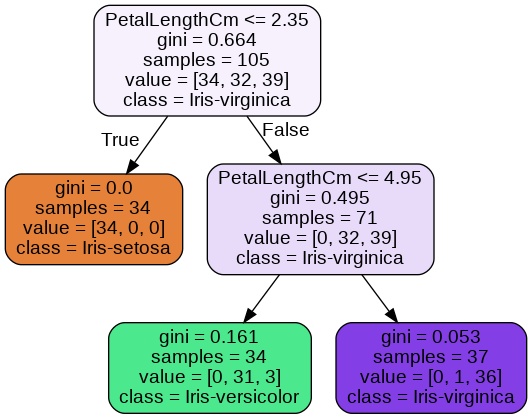

In [0]:
dt_model1 = DecisionTreeClassifier(max_depth=2)
dt_model1.fit(train_x, train_y)
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
feature_names = train_x.columns
class_names = train_y.unique()
class_names.sort()
export_graphviz(dt_model1, out_file=dot_data, feature_names=feature_names, class_names=class_names, filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [0]:
# TODO: read the scikit-learn doc on DecisionTreeClassifier and train a Decision Tree with max depth of 2
# source: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

'''parameters= {
    #"criterion":"gini",
    #"splitter": "random",
    "max_depth":[2]    #The maximum depth of the tree. 
    #,"min_samples_split": [2] #The minimum number of samples required to split an internal node:
}
'''


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Now let's visualize the decision tree we just trained on the iris dataset and see how it makes predictions. Note that if the following code does not work for you because the graphviz is missing, do not worry about it and you should still be able to move on.

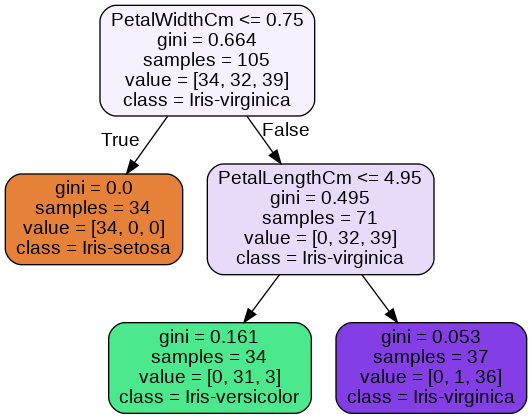

In [0]:
dt_model2 = DecisionTreeClassifier(max_depth=2,min_samples_split=2) ## Making changes and checking
dt_model2.fit(train_x, train_y)

dot_data = StringIO()
feature_names = train_x.columns
class_names = train_y.unique()
class_names.sort()
export_graphviz(dt_model2, out_file=dot_data, feature_names=feature_names, class_names=class_names, filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Decision trees are easy to inteprete and is often referred to as *whitebox* machine learning algorithm. Let's see how this decision tree represented above makes predictions. Suppose you find an iris flower and want to classify it into setosa, versicolor or virginica. You start at the root node (the very top node in the tree). In this node, we check if the flower's patel length is smaller than or equal to 2.35 cm. If it is, we move to the left child and predict setosa to be its class. Otherwise, we move to the right child node. Then similarly we check if the petal length is smaller than or equal to 4.95 cm. If it is, we move to its left child node and predict versicolor to be its class. Otherwise, we move to its right child and predict virginica to be its class. 

#### 3.Prediction with Decision tree

With this simple decision tree above, we can apply it to make predictions on the test dataset and evaluate its performance.

<span style="color:orange">**Question 3: make prediction using the trained decision tree model on the test data.**

In [0]:
# TODO: use the trained decision tree model to make predictions on the test data and evaluate the model performance.
## Steps
## 1: Now feed the test_data to the model. The prediction shall happen on test data based on th etraining which happened in the pevious step
## 2: Then the numbers shall be validated against the actual value
## 3: Then the accuracy of the model shall be evaluated

## 1: Now feed the test_data to the model. The prediction shall happen on test data based on th etraining which happened in the pevious step
train_z = dt_model.predict(train_x)
train_z_prob = dt_model.predict_proba(train_x)[:,1]
test_z = dt_model.predict(test_x)
test_z_prob = dt_model.predict_proba(test_x)[:,1]

print("model accuracy: {}".format(accuracy_score(test_y, test_z)))
print("model confusion matrix:\n {}".format(confusion_matrix(test_y, test_z, labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])))
'''----------------'''
print("Decision Tree model accuracy on train set: {}".format(accuracy_score(train_y, train_z)))
print("Decision Tree model accuracy on test set: {}".format(accuracy_score(test_y, test_z)))
'''------------------'''
# print("model ROC AUC on train set: {}".format(roc_auc_score(train_y, train_z_prob))) 
# print("model ROC AUC on test set: {}".format(roc_auc_score(test_y, test_z_prob)))
# Unable to understand the reason for the failure. ValueError: multi_class must be in ('ovo', 'ovr')

model accuracy: 0.9111111111111111
model confusion matrix:
 [[16  0  0]
 [ 0 17  1]
 [ 0  3  8]]
Decision Tree model accuracy on train set: 0.9619047619047619
Decision Tree model accuracy on test set: 0.9111111111111111


'------------------'

#### 4.Hyper-parameters

Hyper-parameter controls the complexity of the decision tree model. For example, the deeper the tree is, the more complex patterns the model will be able to capture. In this exercise, we train the decision trees with increasing number of maximum depth and plot its performance. We should see the accuracy of the training data increase as the tree grows deeper, but the accuracy on the test data might not as the model will eventually start to overfit and does not generalize well on the unseen test data.

<span style="color:orange">**Question 4: for each value of max_depth, we train a decision tree model and evaluate its accuracy on both train and test data, and plot both accuracies in the figure.**

[0.6, 0.9111111111111111, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777]


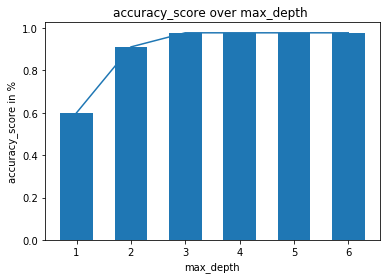

In [0]:
# TODO: train the decision tree model with various max_depth, make predictions and evaluate on both train and test data.
# the different values that shall be taken for the depth will be 2,3,4
max_depth = [1,2,3,4,5,6]
accuracy_seen = []
parameters = {
    "max_depth": max_depth
    #,"min_samples_split": min_samples_split
}
for depths in max_depth:
    # train the model with max_depth =2 print(depths,",", type(depths))
    dt_model = DecisionTreeClassifier(max_depth=depths,min_samples_split=2)
    dt_model.fit(train_x, train_y)

    train_z = dt_model.predict(train_x)
    train_z_prob = dt_model.predict_proba(train_x)[:,1]
    test_z = dt_model.predict(test_x)
    test_z_prob = dt_model.predict_proba(test_x)[:,1]
    
    accuracy_seen.append(accuracy_score(test_y, test_z)) # storing values in a list to plot the values 

## doubt: unable to annotate, annot = True is failing here 
print(accuracy_seen)
plt.bar(max_depth,accuracy_seen,width=0.6) 
plt.title("accuracy_score over max_depth ")
plt.xlabel("max_depth")
plt.ylabel("accuracy_score in %")
plt.plot(max_depth,accuracy_seen)

###### Inference: The visuals above shows that the valueof accruacy peaks at 97.77% of accurancy, which is achieved with max_depth =2 and further change in value of ma_depth do not have any impact on the accuracy 

#### 5.Fine-tune the decision tree classifier

Decision tree is a very powerful model with very few assumptions about the incoming training data (unlike linear models, which assume the data linear), however, it is more likely to overfit the data and won't generalize well to unseen data. To void overfitting, we need to restrict the decision tree's freedom during training via regularization (e.g. max_depth, min_sample_split, max_leaf_nodes and etc.).

To fine-tune the model and combat overfitting, use grid search with cross-validation (with the help of the GridSearchCV class) to find the best hyper-parameter settings for the DecisionTreeClassifier. In particular, we would like to fine-tune the following hyper-parameters:
- **criteria**: this defines how we measure the quality of a split. we can choose either "gini" for the Gini impurity or "entropy" for the information gain.
- **max_depth**: the maximum depth of the tree. This indicates how deep the tree can be. The deeper the tree, the more splits it has and it captures more information about the data. But meanwhile, deeper trees are more likely to overfit the data. For this practice, we will choose from {1, 2, 3} given there are only 4 features in the iris dataset.
- **min_samples_split**: This value represents the minimum number of samples required to split an internal node. The smaller this value is, the deeper the tree will grow, thus more likely to overfit. On the other hand, if the value is really large (the size of the training data in the extreme case), the tree will be very shallow and could suffer from underfit. In this practice, we choose from {0.01, 0.05, 0.1, 0.2}.

<span style="color:orange">**Question 5: Use grid search with 3-fold cross-validation to fine-tune the decision tree model and output the best hyper-parameters.**

In [0]:
# TODO: fine-tune the model, use grid search with 3-fold cross-validation.
## Step 1 In the parameter dictionary, the different set of values were set.
## the result of the previous exercise was 97.77 % accuracy. 
## Let us see if changing the other parametrs can help us exceed that
#"criterion": ['gini','entropy'],
parameters = {
    #"criteria": ['gini','entropy'],
    "criterion": ['gini','entropy'],
    "max_depth": [1,2,3,4], 
    "min_samples_split": [0.005,0.010,0.050, 0.100, 0.150, 0.200, 0.250]
}
dtc = DecisionTreeClassifier()   # dt here is the instance of the class DecisionTreeClassifier
dtc_grid = GridSearchCV(dtc,parameters, cv=3)           # TODO
#print(grid)
dtc_grid.fit(train_x, train_y)
# summarize the results of the grid search
print("The best score is {}".format(dtc_grid.best_score_)) #0.9619047619047619
print("The best hyper parameter setting is {}".format(dtc_grid.best_params_))

The best score is 0.9619047619047619
The best hyper parameter setting is {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 0.005}


#### Prediction and Evaluation

Now we have a fine-tuned decision tree classifier based on the training data, let's apply this model to make predictions on the test data and evaluate its performance.

In [0]:
dtc_grid.predict(test_x) ## using the instance of the GridSearchCV grid
test_z = dtc_grid.predict(test_x)
test_z_prob = dtc_grid.predict_proba(test_x)[:,1]

print("model accuracy: {}".format(accuracy_score(test_y, test_z))) #0.9777777777777777
print("model confusion matrix:\n {}".format(confusion_matrix(test_y, test_z, labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])))

#print("model accuracy: {}".format(accuracy_score(test_y, test_z)))
#print("model ROC AUC: {}".format(roc_auc_score(test_y, test_z_prob)))

model accuracy: 0.9777777777777777
model confusion matrix:
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


## 6. Random Forest

**Question 6: Apply Random Forest together with Gridsearch to the Iris dataset and evaluate its accuracy.**

In [0]:
### TODO 
#1 Call the class / namespace that implement's scikit learn's RandomForst
from sklearn.ensemble import RandomForestClassifier
rfc_parameters= {
    "criterion": ['gini','entropy'],
    "n_estimators": [5,10,15,20,25,30,40,50,75,100], 
    "random_state": [0,1]
}
#Now create an instance of the class RandomForestClassifier
rfc =  RandomForestClassifier() #n_estimators=100,criterion="entropy" ,random_state=)
rfc_grid = GridSearchCV(rfc,rfc_parameters,cv=3)
rfc_grid.fit(train_x, train_y)

# summarize the results of the grid search
print("The best score is {}".format(rfc_grid.best_score_))
print("The best hyper parameter setting is {}".format(rfc_grid.best_params_))


# Checking the performance on the Test dataset 
rfc_grid.predict(test_x) ## using the instance of the GridSearchCV grid
rfc_test_z = rfc_grid.predict(test_x)
rfc_test_z_prob = rfc_grid.predict_proba(test_x)[:,1]

print("Random Forest model accuracy: {}".format(accuracy_score(test_y, rfc_test_z))) #0.9619047619047619
print("Random Forest model confusion matrix:\n {}".format(confusion_matrix(test_y, rfc_test_z, labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])))

#print("If this message came,no error came :) ")

The best score is 0.9619047619047619
The best hyper parameter setting is {'criterion': 'gini', 'n_estimators': 20, 'random_state': 0}
Random Forest model accuracy: 0.9777777777777777
Random Forest model confusion matrix:
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [0]:
test_z = rfc_grid.predict(test_x)
test_z_prob = rfc_grid.predict_proba(test_x)[:,1] 

rfc_grid.predict_proba(test_x)

#roc_auc_score (test_y, rfc_test_z)
#print("Random Forest model accuracy AUC : {}".format(roc_auc_score (test_y, rfc_test_z))) 
# Error message: could not convert string to float: 'Iris-virginica'
# Probable cause: seems header is getting passed in the data in test_y
# Seems one hot encoding may be needed

ValueError: ignored

### 7.Adaboost

**Question 7: Apply Adaboost together with Gridsearch to the Iris dataset and evaluate its accuracy.**

In [0]:
### TODO 
#1 Call the class / namespace that implement's scikit learn's RandomForst
from sklearn.ensemble import AdaBoostClassifier

#Create an instance of the class
abc = AdaBoostClassifier()
abc_parameters= {
    "n_estimators": [5,10,15,20,25]
    ,"learning_rate": [0.05,0.10,0.15,0.20,0.25,0.5,1,1.25,1.5]
}

abc_grid = GridSearchCV(abc,abc_parameters,cv=3) ##
abc_grid.fit(train_x, train_y)

# summarize the results of the grid search
print("The best score is {}".format(abc_grid.best_score_))
print("The best hyper parameter setting is {}".format(abc_grid.best_params_))

abc_test_z = abc_grid.predict(test_x)
abc_test_z_prob = abc_grid.predict_proba(test_x)[:,1]
abc_test_z_prob
print("model accuracy: {}".format(accuracy_score(test_y, abc_test_z)))
#print("model ROC AUC: {}".format(roc_auc_score(test_y, test_z_prob)))

### 8.Gradient Boosting

**Question 8: Apply Boosting together with Gridsearch to the Iris dataset and evaluate its accuracy.**

In [0]:
### TODO 
#1 Call the class / namespace that implement's scikit learn's RandomForst
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb_parameters= {
    "n_estimators": [5,10,15,20,25]
    ,"learning_rate": [0.01,0.05,0.10,0.15,0.20]
    ,"subsample":[0.05,0.10,0.15,0.20,0.25,0.30,0.40,0.45,0.50]
}
gb_grid = GridSearchCV(gb,gb_parameters,cv=3)
gb_grid.fit(train_x,train_y)


# Summarize the result of the grid search
print("the best score is {0}".format(gb_grid.best_score_ ) )
print("the best hyper parameters are {0}".format(gb_grid.best_params_ ))


---

**BONUS POINT: we will apply the supervised learning models we learnt so far to predict the California housing prices.**

## Bonus:California Housing Dataset

The California Housing dataset appeared in a 1997 paper titled Sparse Spatial Autoregressions by Pace, R. Kelley and Ronald Barry, published in the Statistics and Probability Letters journal. They built it using the 1990 California census data. It contains one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). 

In [0]:
# Load train and test data from CSV files.
chd_train = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/housing_train.csv')
chd_test = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/housing_test.csv')

chd_train_x = chd_train.iloc[:,0:8]
chd_train_y = chd_train.iloc[:,8]

chd_test_x = chd_test.iloc[:,0:8]
chd_test_y = chd_test.iloc[:,8]

In [0]:
# TODO
#Understand the test and train dataset
chd_train.head()
## Looks the dependent parameter to predict here should 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,59200.0


In [0]:
chd_test.isnull().sum() ## This looks good
chd_test.count()

longitude             6192
latitude              6192
housing_median_age    6192
total_rooms           6192
total_bedrooms        6192
population            6192
households            6192
median_income         6192
median_house_value    6192
dtype: int64

In [0]:
#checking for nulls
chd_train.isnull().sum() ## This looks good
chd_train.count() # So 14.5K records + 6.2 k records = 20.7 k records 

longitude             14448
latitude              14448
housing_median_age    14448
total_rooms           14448
total_bedrooms        14448
population            14448
households            14448
median_income         14448
median_house_value    14448
dtype: int64

In [0]:
chd_train.describe()

# if we look at the recods from 75% to max columns, the median house value nearly doubles, meadian income triples, population increases nearly 20 times, coun to bedroom increases 10 times. 
# at least in the traiuning dataset more of sample respondednts belong to high income group


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.566647,35.630093,28.618702,2640.132683,538.257009,1425.157323,499.508929,3.866667,206824.624516
std,2.006587,2.140121,12.596694,2191.612441,421.564382,1149.580157,383.098390,1.891158,115365.476182
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1451.000000,296.000000,784.000000,279.000000,2.570600,119600.000000
50%,-118.490000,34.260000,29.000000,2125.000000,438.000000,1165.000000,410.000000,3.539100,180000.000000
75%,-118.000000,37.710000,37.000000,3148.000000,645.000000,1724.000000,604.000000,4.736100,263900.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [0]:
chd_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 9 columns):
longitude             14448 non-null float64
latitude              14448 non-null float64
housing_median_age    14448 non-null float64
total_rooms           14448 non-null float64
total_bedrooms        14448 non-null float64
population            14448 non-null float64
households            14448 non-null float64
median_income         14448 non-null float64
median_house_value    14448 non-null float64
dtypes: float64(9)
memory usage: 1016.0 KB


### End of Assignment 2
---
